# Malaria Cell Comparative Study using Machine learning & Deep learning

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier as knn

# Study using Support Vector Machine Classifier

### Load images in structured directory like it's sklearn sample dataset

In [2]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():

            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [3]:
image_dataset = load_image_files("images/")

In [4]:
image_dataset.data.shape

(200, 12288)

In [5]:
image_dataset.target.shape

(200,)

### Split data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

### Train data with parameter optimization

In [7]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

/home/suvhradip/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/suvhradip/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Predict

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print(accuracy_score(y_test, y_pred))

0.8666666666666667


No Skill: ROC AUC=0.867
Logistic: ROC AUC=0.867


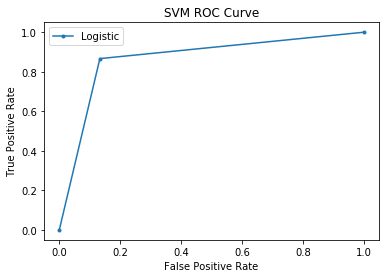

In [10]:
ns_auc = roc_auc_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('SVM ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Report

In [13]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.87      0.87      0.87        30

   micro avg       0.87      0.87      0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60




In [14]:
# print the true and predicted responses
print('True', y_test)
print('Pred', y_pred)

True [0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1]
Pred [0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1]


In [17]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[26  4]
 [ 4 26]]


In [19]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8666666666666667
0.8666666666666667


In [25]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

print('-------------------------------------------------')

sensitivity = TP / float(FN + TP)

print('Sensitivity  :',sensitivity)
print('Recall Score :',metrics.recall_score(y_test, y_pred))

0.13333333333333333
0.1333333333333333
-------------------------------------------------
Sensitivity  : 0.8666666666666667
Recall Score : 0.8666666666666667


# Study using K-NN Classifier

In [26]:
svc = knn()
#clf = GridSearchCV(svc, param_grid)
svc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
y_pred = svc.predict(X_test)

In [28]:
print(accuracy_score(y_test, y_pred))

0.6


No Skill: ROC AUC=0.600
Logistic: ROC AUC=0.600


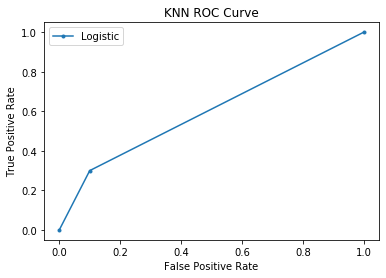

In [29]:
ns_auc = roc_auc_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('KNN ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [30]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.56      0.90      0.69        30
           1       0.75      0.30      0.43        30

   micro avg       0.60      0.60      0.60        60
   macro avg       0.66      0.60      0.56        60
weighted avg       0.66      0.60      0.56        60




In [31]:
# print the true and predicted responses
print('True', y_test)
print('Pred', y_pred)

True [0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1]
Pred [0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]


In [32]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[27  3]
 [21  9]]


In [33]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.6
0.6


In [34]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

print('-------------------------------------------------')

sensitivity = TP / float(FN + TP)

print('Sensitivity  :',sensitivity)
print('Recall Score :',metrics.recall_score(y_test, y_pred))

0.4
0.4
-------------------------------------------------
Sensitivity  : 0.3
Recall Score : 0.3


# Study using Convolutional Neural Network

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [8]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#adding 3rd layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flat

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/suvhradip/SVM-Image-Classification-master/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/home/suvhradip/SVM-Image-Classification-master/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 800,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 200)

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
800/800 [==============================] - 140s 175ms/step - loss: 0.1828 - acc: 0.9227 - val_loss: 0.3581 - val_acc: 0.9000
Epoch 2/5
800/800 [==============================] - 128s 160ms/step - loss: 0.0878 - acc: 0.9724 - val_loss: 0.4296 - val_acc: 0.9333
Epoch 3/5
800/800 [==============================] - 128s 160ms/step - loss: 0.0101 - acc: 0.9973 - val_loss: 0.1585 - val_acc: 0.9500
Epoch 4/5
800/800 [==============================] - 119s 149ms/step - loss: 0.0463 - acc: 0.9854 - val_loss: 0.1652 - val_acc: 0.9333
Epoch 5/5
800/800 [==============================] - 119s 149ms/step - loss: 0.0169 - acc: 0.9948 - val_loss: 0.0072 - val_acc: 1.0000
